In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

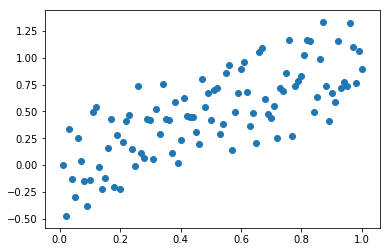

In [30]:
n = 100
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5

plt.scatter(x,y)

In [31]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
model.coef_, model.intercept_

(array([ 1.02933879]), -0.033507184809425328)

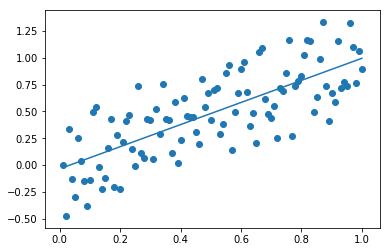

In [33]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

This is the training set. We need to use a test set to see if the model fits new data.

## How do we "test" this model on "new" data if we don't have a new dataset?

### Instead of using all of our data to produce this model, let's use some, and save the rest as a reserve 

In [34]:
model = LinearRegression()
model.fit(x[:50], y[:50])
model.coef_, model.intercept_

(array([ 1.3019961]), -0.10103343286824271)

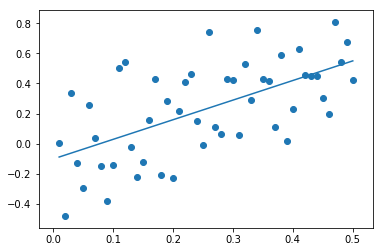

In [35]:
plt.scatter(x[:50],y[:50])
plt.plot(x[:50], np.dot(x[:50], model.coef_) + model.intercept_)

## Our slope doesn't match the previous slope with all the data. Why not? 
## Let's plot all of our data with this model to see

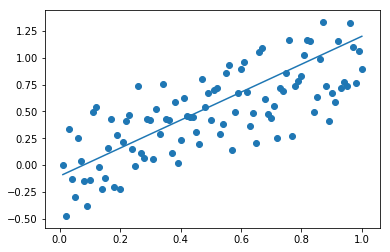

In [36]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## We only used the first half of our data and neglected the second half. 

### Let's try this again differently. Let's shuffle our data first

In [37]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [38]:
p = shuffle(x, y)

In [39]:
p

array([86, 61,  1, 46, 92, 96, 99, 89, 41, 98, 69, 37, 59, 20, 43, 58, 28,
       32, 45,  3, 33,  2, 82,  8, 39, 18, 29, 44, 38, 70, 65, 13, 76,  9,
       97, 79, 52, 93, 21, 60, 94, 87, 53, 88, 24,  6, 34, 68, 15, 91, 81,
       84, 62, 12, 83, 42, 31, 14, 47, 40,  7, 17, 35, 72, 22, 27, 26, 64,
       75, 36, 23, 55, 66, 57, 73, 49, 16, 56, 80, 63, 74, 30, 25, 19,  5,
       71, 10, 11,  0, 50, 85, 95, 51, 67, 90, 48, 54,  4, 78, 77])

In [40]:
x[[2, 0, 1, 4]]

array([[ 0.03],
       [ 0.01],
       [ 0.02],
       [ 0.05]])

In [41]:
x[p], y[p]

(array([[ 0.87],
        [ 0.62],
        [ 0.02],
        [ 0.47],
        [ 0.93],
        [ 0.97],
        [ 1.  ],
        [ 0.9 ],
        [ 0.42],
        [ 0.99],
        [ 0.7 ],
        [ 0.38],
        [ 0.6 ],
        [ 0.21],
        [ 0.44],
        [ 0.59],
        [ 0.29],
        [ 0.33],
        [ 0.46],
        [ 0.04],
        [ 0.34],
        [ 0.03],
        [ 0.83],
        [ 0.09],
        [ 0.4 ],
        [ 0.19],
        [ 0.3 ],
        [ 0.45],
        [ 0.39],
        [ 0.71],
        [ 0.66],
        [ 0.14],
        [ 0.77],
        [ 0.1 ],
        [ 0.98],
        [ 0.8 ],
        [ 0.53],
        [ 0.94],
        [ 0.22],
        [ 0.61],
        [ 0.95],
        [ 0.88],
        [ 0.54],
        [ 0.89],
        [ 0.25],
        [ 0.07],
        [ 0.35],
        [ 0.69],
        [ 0.16],
        [ 0.92],
        [ 0.82],
        [ 0.85],
        [ 0.63],
        [ 0.13],
        [ 0.84],
        [ 0.43],
        [ 0.32],
        [ 0.15],
        [ 0.48

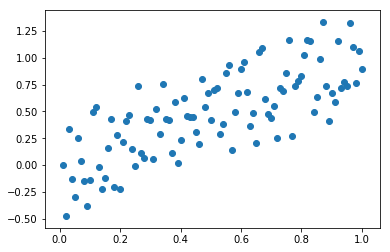

In [42]:
plt.scatter(x[p],y[p])

### Still plots the same scatter plot

### So, let's use the first 50 points of the shuffled data instead and see if the model is similar 

In [43]:
model = LinearRegression()
model.fit(x[p][:50], y[p][:50])
model.coef_, model.intercept_

(array([ 1.0349904]), -0.056649486412697292)

### Success! We got a similar slope as before with half of the points 

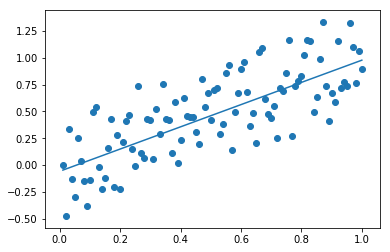

In [44]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

###  So how do we check the validity of the model on the rest of the points? The loss (Error) function of course!
### $E = \Sigma y - \hat{y} = \Sigma y - \beta \cdot x$

### $E = \frac{1}{N}\Sigma y - \hat{y} = \frac{1}{N}\Sigma y - \beta \cdot x$
### Why divide by N? 
This way we have a _mean_ error that's invariant to the number of points you use to build your model. Otherwise, your error would increase with the number of points

In [46]:
x[50:]

array([[ 0.51],
       [ 0.52],
       [ 0.53],
       [ 0.54],
       [ 0.55],
       [ 0.56],
       [ 0.57],
       [ 0.58],
       [ 0.59],
       [ 0.6 ],
       [ 0.61],
       [ 0.62],
       [ 0.63],
       [ 0.64],
       [ 0.65],
       [ 0.66],
       [ 0.67],
       [ 0.68],
       [ 0.69],
       [ 0.7 ],
       [ 0.71],
       [ 0.72],
       [ 0.73],
       [ 0.74],
       [ 0.75],
       [ 0.76],
       [ 0.77],
       [ 0.78],
       [ 0.79],
       [ 0.8 ],
       [ 0.81],
       [ 0.82],
       [ 0.83],
       [ 0.84],
       [ 0.85],
       [ 0.86],
       [ 0.87],
       [ 0.88],
       [ 0.89],
       [ 0.9 ],
       [ 0.91],
       [ 0.92],
       [ 0.93],
       [ 0.94],
       [ 0.95],
       [ 0.96],
       [ 0.97],
       [ 0.98],
       [ 0.99],
       [ 1.  ]])

In [48]:
np.dot(x[50:], model.coef_) + model.intercept_ # y hat

array([ 0.47119562,  0.48154552,  0.49189542,  0.50224533,  0.51259523,
        0.52294514,  0.53329504,  0.54364494,  0.55399485,  0.56434475,
        0.57469466,  0.58504456,  0.59539446,  0.60574437,  0.61609427,
        0.62644418,  0.63679408,  0.64714398,  0.65749389,  0.66784379,
        0.6781937 ,  0.6885436 ,  0.6988935 ,  0.70924341,  0.71959331,
        0.72994322,  0.74029312,  0.75064302,  0.76099293,  0.77134283,
        0.78169274,  0.79204264,  0.80239254,  0.81274245,  0.82309235,
        0.83344226,  0.84379216,  0.85414206,  0.86449197,  0.87484187,
        0.88519178,  0.89554168,  0.90589158,  0.91624149,  0.92659139,
        0.9369413 ,  0.9472912 ,  0.9576411 ,  0.96799101,  0.97834091])

In [49]:
y[50:] - np.dot(x[50:], model.coef_) + model.intercept_ # y - y hat

array([ 0.11997935,  0.12501922, -0.31586728, -0.23507549,  0.23475324,
        0.30085647, -0.5071104 , -0.16321912,  0.0045735 ,  0.21422277,
        0.27231852, -0.02042365, -0.34649644, -0.23690628, -0.527462  ,
        0.31873979,  0.34648979, -0.14233695, -0.29245118, -0.33806386,
       -0.23588603, -0.55101304, -0.0903832 , -0.13235565,  0.0260549 ,
        0.32054034, -0.58206894, -0.12289836, -0.09399743, -0.05155472,
        0.13183157,  0.25972036,  0.23687331, -0.43143254, -0.30460067,
        0.04608447,  0.37977977, -0.23032528, -0.56675928, -0.31731339,
       -0.40650951,  0.14852882, -0.29920546, -0.25681838, -0.30538354,
        0.27273925,  0.03970631, -0.30384092, -0.0183401 , -0.193963  ])

In [51]:
np.square(y[50:] - np.dot(x[50:], model.coef_) + model.intercept_) # square each value individually to get error values

array([  1.43950444e-02,   1.56298049e-02,   9.97721410e-02,
         5.52604861e-02,   5.51090838e-02,   9.05146156e-02,
         2.57160958e-01,   2.66404807e-02,   2.09168596e-05,
         4.58913934e-02,   7.41573764e-02,   4.17125297e-04,
         1.20059780e-01,   5.61245868e-02,   2.78216159e-01,
         1.01595055e-01,   1.20055172e-01,   2.02598066e-02,
         8.55276923e-02,   1.14287172e-01,   5.56422203e-02,
         3.03615370e-01,   8.16912336e-03,   1.75180191e-02,
         6.78857574e-04,   1.02746111e-01,   3.38804256e-01,
         1.51040065e-02,   8.83551601e-03,   2.65788950e-03,
         1.73795624e-02,   6.74546648e-02,   5.61089658e-02,
         1.86134037e-01,   9.27815702e-02,   2.12377824e-03,
         1.44232672e-01,   5.30497332e-02,   3.21216078e-01,
         1.00687785e-01,   1.65249981e-01,   2.20608111e-02,
         8.95239094e-02,   6.59556828e-02,   9.32591078e-02,
         7.43866966e-02,   1.57659127e-03,   9.23193060e-02,
         3.36359407e-04,

In [52]:
np.sum(np.square(y[50:] - np.dot(x[50:], model.coef_) + model.intercept_)) # total error

4.1683251583072716

In [57]:
np.sum(np.square(y[p][50:] - np.dot(x[p][50:], model.coef_) + model.intercept_))/50 # mean error

0.077890090166752343

### Is there a shorter way of calculating this error?
Why yes, of course! Scikit-Learn to the rescue

In [54]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(y[p][50:], np.dot(x[p][50:], model.coef_) + model.intercept_)

0.074247978590520153

### Why the slight discrepancy in values? 
Let's check the Documentation
[http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error]

Turns out sklearn sums N-1 values and not all N because Statistics
[http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance]

## Is there an easier way to shuffle the data?
I'm glad you asked [http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html]

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5) # shuffles x and y, test_size is size of test data

In [60]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 1.07373571]), -0.048510860668423805)

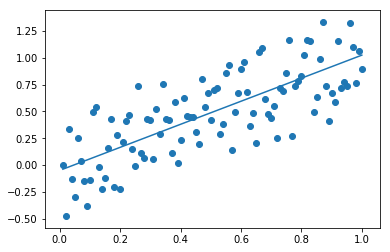

In [61]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [63]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.068433859842931252

In [62]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_) # error of training set

0.068748780479374008

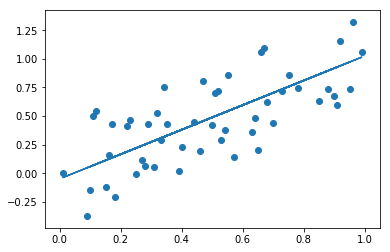

In [64]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

Can also do a ridge regression here.

The point for doing all this: I built a model, here are four other ones, let me see how they compare.